In [2]:
import pandas as pd

df = pd.DataFrame()
df['cook_time'] = [-1, -1, 1, 1]
df['sugar'] = [-1, +1, -1, +1]
df['result'] = [3, 4, 5, 9]
df

,cook_time,sugar,result
0,-1,-1,3
1,-1,1,4
2,1,-1,5
3,1,1,9


#### 실험계획
1) 인자 별로 y에 대한 영향력이 어느 정도 신뢰수준으로 파악 가능한가.
2) 인자 영향력 파악 신뢰수준 높이려면 진행해야 하는 실험 조건은? 
3) 인자의 level별 그룹분석 할 때 다른 인자 조건이 다 달라도 그냥 해당 인자 기준으로 분포차이 분석해도 괜찮을까?


#### 교락 작용이 있는 인자 쌍 파악하기
 - 5) a 상향시 b 인자도 상향한 조건에서 실험해서 (교락작용발생) y값 변화가 둘 중 어느 인자의 상향으로 인한 영향인지 파악해야 한다 말하는 기준수치

# 실험추가 방법
1. 고정시키고 싶은 변수, value 입력
2. 그 변수 제외하고 전체 실험 변수 pdb design으로 실험값 만들기
3. pandas drop duplicate로 기존 존재 포인트는 제외
sns pair plot으로 영역 보여주기


In [7]:
import seaborn as sns

df = pd.read_csv("ofat_data.csv")

# sns.pairplot(df, corner=True)

In [10]:
# sns.pairplot(df, corner=True)
xcols = 

# 일반적인 실험계획법
1) OFAT(Changing one factor at a time)
단점: 인자간의 interaction을 파악 불가능
ex) 온도와 압력을 조절해볼 떄 한값씩만 흔들어보면 두 인자간의 synergistic effect는 파악 불가능
타겟에 도달하기 위해서는 인자간의 연관작용까지 고려해야 하는데 OFAT는 최대성능 확보 어려움

2) best guess approach
한두인자 바꿔보고 다음 실험할 때 지금 실험의 최적값부터 다시 흔들어보는 방식
단점: 최적 솔루션이라는 보장이 없음. 타겟확보 못하고 인자만 자꾸 흔들어보는 경우가 생길 수 있음

3) OFAT + Best guess approach로 실험하는 과정 예시
 - 온도를 흔들어보면서 타겟에 가까워지다가 감소하면 흔들기 멈춤, 이번에는 물질을 흔들어보면서 최적값 찾는다.
 - 위와같은 실험을 할 경우 최적값이 전 영역의 optimal값이 아닌 지역적인 optimal한 값으로 만족해야한다.
 - 특히 흔들어야 하는 인자가 많은데 OFAT + Best guess approach를 할 경우 실험수가 많아질 것임

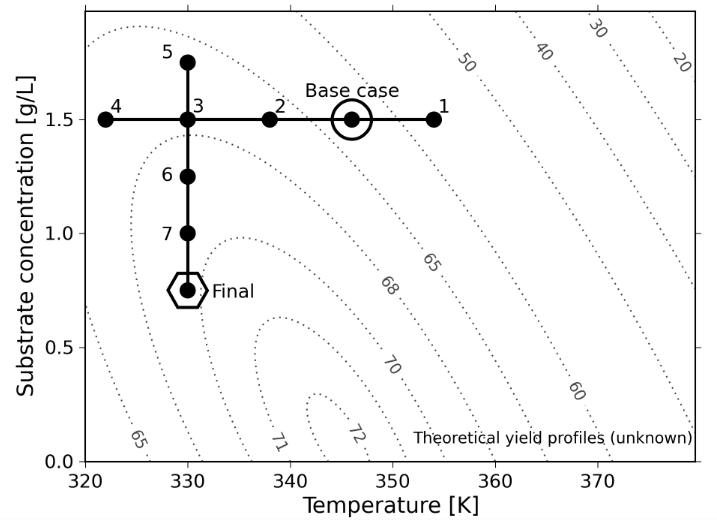
<br>



 - 참고: https://www.coursera.org/learn/experimentation 
 <br>
 https://learnche.org/pid/design-analysis-experiments/changing-one-single-variable-at-a-time

In [ ]:
https://learnche.org/pid/design-analysis-experiments/fractional-factorial-designs/index


- statistical power가 낮다 == 유의미한 차이가 있는데 알아차리지 못한다.

1) effect size : 모집단에 결과가 분포하는 정량적 수치
(quantified magnitude of a result present in the population)
2) sample size : 표본 샘플 수
3) significance: 분석결과가 유의미한 정도
4) statistical power: 반대가정을 받아들일 수 있는 확률

power analysis - 4개 중에서 3값이 있을 때 다른 한 값을 예측하는 분석기법


#### 1. 현재까지시 데이터로 영향성 분석하기

# 실험 영역 내 인자 별 검정력(power)를 알아보자 
 - ( 인자별 최소, 최댓값이 골고루 실험 되었는가를 파악하는 것임)
  즉, power가 작은 인자는 추가적인 split 평가를 해야한다는 것이다.
1) 5개 인자를 min, max 영향성 보고싶으면 2^5번 실험하면 되는데 그때 5개인자 검정력 다 100% 가까움
2) 2**4번 실험했을때도 94% 이상의 검정력이 나옴
3) 중간값 잡고 인자별로 min, max로 흔들어보면 factor 별 power를 20% 정도만 알 수 있음

#### 1.1. 5개 인자의 2 level 영향성을 full factorial로 계산해보기

In [5]:
import dexpy.factorial
import dexpy.power
import pandas as pd
import numpy as np

coffee_design = dexpy.factorial.build_factorial(5, 2**5)

center_points = [
    [0, 0, 0, -1, -1],
    [0, 0, 0, -1, 1],
    [0, 0, 0, 1, -1],
    [0, 0, 0, 1, 1]
]
coffee_design = coffee_design.append(pd.DataFrame(center_points * 2, columns=coffee_design.columns))
coffee_design.index = np.arange(0, len(coffee_design))

model = ' + '.join(coffee_design.columns)
sn = 0.8
alpha = 0.05
factorial_power = dexpy.power.f_power(model, coffee_design, sn, alpha)
factorial_power.pop(0) # remove intercept
factorial_power = ['{0:.2f}%'.format(i*100) for i in factorial_power] # convert to %

factorial_power  # 


['59.43%', '59.43%', '59.43%', '69.07%', '69.07%']

#### 1.2. 5개 인자의 2 level 영향성을 fractional factorial(16번 실험)으로 계산해보기

In [6]:
coffee_design = dexpy.factorial.build_factorial(5, 2**(5-1))
coffee_design.columns = ['amount', 'grind_size', 'brew_time', 'grind_type', 'beans']


center_points = [
    [0, 0, 0, -1, -1],
    [0, 0, 0, -1, 1],
    [0, 0, 0, 1, -1],
    [0, 0, 0, 1, 1]
]
coffee_design = coffee_design.append(pd.DataFrame(center_points * 2, columns=coffee_design.columns))
coffee_design.index = np.arange(0, len(coffee_design))

model = ' + '.join(coffee_design.columns)
sn = 0.7
alpha = 0.05
factorial_power = dexpy.power.f_power(model, coffee_design, sn, alpha)
factorial_power.pop(0) # remove intercept
factorial_power = ['{0:.2f}%'.format(i*100) for i in factorial_power] # convert to %
factorial_power 


['26.35%', '26.35%', '26.35%', '36.84%', '36.84%']

#### coffe 맛 점수 넣고 예측모델 만들기

In [7]:
coffee_design['taste_rating'] = [
    4.4, 2.6, 2.4, 8.6, 1.6, 2.8, 7.2, 3.4,
    6.8, 3.4, 3.8, 9.0, 5.2, 3.6, 8.2, 7.0,
    5.4, 6.8, 3.6, 5.4, 4.8, 6.2, 4.4, 5.8
]

from statsmodels.formula.api import ols

lm = ols("taste_rating ~" + model, data=coffee_design).fit()
print(lm.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.261   
Dependent Variable: taste_rating     AIC:                100.4670
Date:               2024-02-07 23:05 BIC:                107.5354
No. Observations:   24               Log-Likelihood:     -44.234 
Df Model:           5                F-statistic:        2.622   
Df Residuals:       18               Prob (F-statistic): 0.0597  
R-squared:          0.421            Scale:              3.1141  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       5.1000    0.3602  14.1583  0.0000   4.3432  5.8568
amount          0.8750    0.4412   1.9834  0.0628  -0.0519  1.8019
grind_size     -0.1250    0.4412  -0.2833  0.7802  -1.0519  0.8019
brew_time       1.2000    0.4412   2.7200  0.0140   0.2731  2.1269
grind_type     -0.13

In [8]:
coffee_design.columns

Index(['amount', 'grind_size', 'brew_time', 'grind_type', 'beans',
       'taste_rating'],
      dtype='object')

Text(0.5, 0, 'pred')

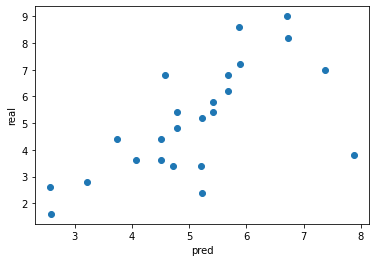

In [9]:
pred = lm.predict(coffee_design[['amount', 'grind_size', 'brew_time', 'grind_type', 'beans']])
plt.scatter(pred, coffee_design['taste_rating'])
plt.ylabel('real')
plt.xlabel('pred')

In [29]:
import matplotlib.pyplot as plt

In [33]:
confounding variables - 교란변수, 실험할 떄 고려하지않은 변수인데, 실험인자랑 결과 사이에 영향을 주는 인자.
ex) 아이 시험성적과 부모님 차 가격이 비례 관계인데 이때 confounding variables 가 부모 소득이고, 이게 교란변수임.


()

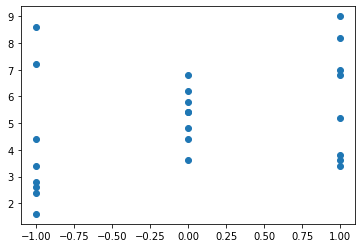

In [31]:
import matplotlib.pyplot as plt
plt.scatter(coffee_design['amount'],coffee_design['taste_rating'] )

In [26]:
# p value <0.05인 값만 
# this gets the pvalues dataframe from the RegressionResults
# and slices out the rows with p < 0.05
pvalues = lm.pvalues[1:]
reduced_model = '+'.join(pvalues.loc[pvalues < 0.1].index)
# you could also just specify it by hand:
# reduced_model = "amount + brew_time + beans + amount:beans + " \
#                 "grind_size:grind_type + brew_time:grind_type"
lm = ols("taste_rating ~" + reduced_model, data=coffee_design).fit()
print(lm.summary2())


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.304   
Dependent Variable: taste_rating     AIC:                96.7277 
Date:               2024-02-07 10:54 BIC:                100.2619
No. Observations:   24               Log-Likelihood:     -45.364 
Df Model:           2                F-statistic:        6.016   
Df Residuals:       21               Prob (F-statistic): 0.00860 
R-squared:          0.364            Scale:              2.9329  
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept   5.1000     0.3496   14.5892   0.0000    4.3730   5.8270
amount      0.8750     0.4281    2.0437   0.0537   -0.0154   1.7654
brew_time   1.2000     0.4281    2.8028   0.0107    0.3096   2.0904
-----------------------------------------------------------------
Omnibus:       

In [1]:
pred = lm.predict(coffee_design[['amount', 'brew_time']])
plt.scatter(pred, coffee_design['taste_rating'])
plt.ylabel('real')
plt.xlabel('pred')

NameError: name 'lm' is not defined

#### 1.3. 일반적 공정 실험 방식으로 검정력 계산해보기

In [72]:
center_points = [
    [0, 0, 0, 0, -1],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0],
    [0, 0, 0, -1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, -1, 0, 0],
    [0, 1, 0, 0, 0],
    [0, -1, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [-1, 0, 0, 0, 0]
]
coffee_design = pd.DataFrame(center_points)
coffee_design.columns = ['amount', 'grind_size', 'brew_time', 'grind_type', 'beans']
coffee_design

model = ' + '.join(coffee_design.columns)
sn = 2.0
alpha = 0.05
factorial_power = dexpy.power.f_power(model, coffee_design, sn, alpha)
factorial_power.pop(0) # remove intercept
factorial_power = ['{0:.2f}%'.format(i*100) for i in factorial_power] # convert to %
factorial_power 

['19.52%', '19.52%', '19.52%', '19.52%', '19.52%']

# interaction model을 만들어서 인자별 영향력을 알아보자

In [ ]:
https://statease.github.io/dexpy/example-coffee.html#problem-description

In [73]:
coffee_design = dexpy.factorial.build_factorial(5, 2**(5-1))
coffee_design.columns = ['amount', 'grind_size', 'brew_time', 'grind_type', 'beans']
center_points = [
    [0, 0, 0, -1, -1],
    [0, 0, 0, -1, 1],
    [0, 0, 0, 1, -1],
    [0, 0, 0, 1, 1]
]

coffee_design = coffee_design.append(pd.DataFrame(center_points * 2, columns=coffee_design.columns))
coffee_design.index = np.arange(0, len(coffee_design))

['19.52%', '19.52%', '19.52%', '19.52%', '19.52%']

In [18]:
time_minus = df[df['cook_time']==-1]
time_plus = df[df['cook_time']==1]

sugar_minus = df[df['sugar']==-1]
sugar_plus = df[df['sugar']==1]
print(time_minus)
print(time_plus)

   cook_time  sugar  result
0         -1     -1       3
1         -1      1       4
   cook_time  sugar  result
2          1     -1       5
3          1      1       9


In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np

ycol = 'result'
xcols = df.columns.difference([ycol])


ytrain = df[ycol]
xtrain = df[xcols]
xtrain
reg = LinearRegression().fit(xtrain, ytrain)
coef = reg.coef_
coef_r = [np.round(i, 3) for i in coef]
coef_r
inter =  reg.intercept_
print(f'equation: {coef_r[1]}*sugar + {coef_r[0]}*time + {inter}')

print('regression value: ',reg.predict(xtrain))
print('real value: ', ytrain.values)

equation: 1.25*sugar + 1.75*time + 5.25
regression value:  [2.25 4.75 5.75 8.25]
real value:  [3 4 5 9]


In [20]:
reg.predict([[0, 1]])

array([6.5])

In [21]:
# interaction 고려
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


ycol = 'result'
xcols = df.columns.difference([ycol])
ytrain = df[ycol]
xtrain = df[xcols]

poly = PolynomialFeatures(interaction_only = True, include_bias = False)
inter_xtrain = poly.fit_transform(xtrain)
inter_cols = poly.get_feature_names(xtrain.columns)

# xtrain
reg2 = LinearRegression().fit(inter_xtrain, ytrain)
coef = reg2.coef_
coef = [np.round(i, 3) for i in coef]
inter =  reg2.intercept_
print(f'equation: {coef[0]}*{inter_cols[0]} + {coef[1]}*{inter_cols[1]} + {coef[2]}*{inter_cols[2]} + {inter}')

print('regression value: ',reg2.predict(inter_xtrain))
print('real value:', ytrain.values)
print('interaction model score:', reg2.score(inter_xtrain, ytrain))
print('no interaction model score:', reg.score(xtrain, ytrain))


equation: 1.75*cook_time + 1.25*sugar + 0.75*cook_time sugar + 5.25
regression value:  [3. 4. 5. 9.]
real value: [3 4 5 9]
interaction model score: 1.0
no interaction model score: 0.891566265060241


KeyError: 'corn'

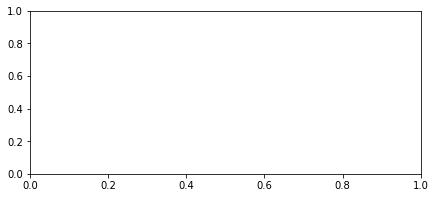

In [22]:


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (7,3))
plt.plot(time_minus['corn'], time_minus['result'], label = 'time=minus')
plt.plot(time_plus['corn'], time_plus['result'], label = 'time=plus')
plt.legend()
plt.xlabel('corn')
plt.show()
fig, ax = plt.subplots(figsize = (7,3))
plt.plot(corn_minus['time'], corn_minus['result'], label = 'corn=minus')
plt.plot(corn_plus['time'], corn_plus['result'], label = 'corn=plus')
plt.legend()
plt.xlabel('time')
plt.show()

In [ ]:
np.array(list(df['result'].values)).reshape(-1, 1)

array([[52],
       [74],
       [62],
       [80]], dtype=int64)

In [ ]:
xtrain.values.reshape(1, -1)

array([[-1, -1, -1,  1,  1, -1,  1,  1]], dtype=int64)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

ycol = 'result'
xcols = df.columns.difference([ycol])


ytrain = df[ycol]
xtrain = df[xcols]
xtrain
reg = LinearRegression().fit(xtrain, ytrain)
coef = reg.coef_
inter =  reg.intercept_
print(f'equation: {coef[0]}*corn + {coef[1]}*time + {inter}')

print('regression value: ',reg.predict(xtrain))
print('real value: ', ytrain.values)

equation: 4.0*corn + 10.0*time + 67.0
regression value:  [53. 73. 61. 81.]
real value:  [52 74 62 80]


In [ ]:
v = [52, 74, 62, 80]
sum(v)/4

67.0

In [ ]:
10*(0.0)+ 4*(-1) +67

63.0

In [ ]:

corn_minus

,corn,time,result
0,-1,-1,52
1,-1,1,74


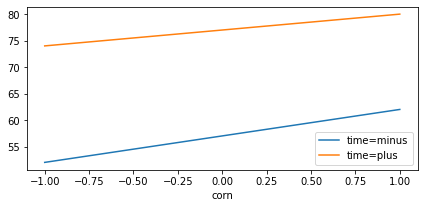

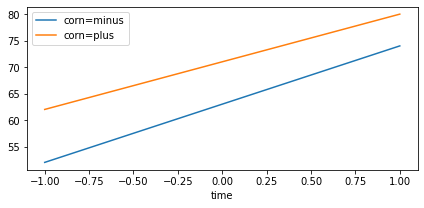

In [ ]:
time_minus = df[df['time']==-1]
time_plus = df[df['time']==1]

corn_minus = df[df['corn']==-1]
corn_plus = df[df['corn']==1]


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (7,3))
plt.plot(time_minus['corn'], time_minus['result'], label = 'time=minus')
plt.plot(time_plus['corn'], time_plus['result'], label = 'time=plus')
plt.legend()
plt.xlabel('corn')
plt.show()
fig, ax = plt.subplots(figsize = (7,3))
plt.plot(corn_minus['time'], corn_minus['result'], label = 'corn=minus')
plt.plot(corn_plus['time'], corn_plus['result'], label = 'corn=plus')
plt.legend()
plt.xlabel('time')
plt.show()

In [ ]:

f1_minus

0   -1
1   -1
Name: corn, dtype: int64